In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/genius-song-lyrics-with-language-information/song_lyrics.csv


In [10]:
lyric_database = pd.read_csv("/kaggle/input/genius-song-lyrics-with-language-information/song_lyrics.csv")
lyric_database.head(5)

,title,tag,artist,year,views,features,lyrics,id,language_cld3,language_ft,language
0,Killa Cam,rap,Cam'ron,2004,173166,"{""Cam\\'ron"",""Opera Steve""}","[Chorus: Opera Steve & Cam'ron]\nKilla Cam, Ki...",1,en,en,en
1,Can I Live,rap,JAY-Z,1996,468624,{},"[Produced by Irv Gotti]\n\n[Intro]\nYeah, hah,...",3,en,en,en
2,Forgive Me Father,rap,Fabolous,2003,4743,{},Maybe cause I'm eatin\nAnd these bastards fien...,4,en,en,en
3,Down and Out,rap,Cam'ron,2004,144404,"{""Cam\\'ron"",""Kanye West"",""Syleena Johnson""}",[Produced by Kanye West and Brian Miller]\n\n[...,5,en,en,en
4,Fly In,rap,Lil Wayne,2005,78271,{},"[Intro]\nSo they ask me\n""Young boy\nWhat you ...",6,en,en,en


In [38]:
db = lyric_database.sample(frac=0.01, random_state=10) #this database has 3 million entries
db = (
    db
    .loc[db["language"] == "en"]
    .loc[db["tag"] != "misc"]
    .loc[db["tag"] != ""]
    .loc[db["tag"] != None]
    .loc[db["lyrics"] != None]
    .loc[db["lyrics"] != ""]
    .loc[db["lyrics"] != "[Instrumental]"]
)
columns_of_interest = ['id', 'title','artist', 'lyrics', 'tag']
db = db[columns_of_interest]
db = db.sort_values(by="id")
db.head(10)

,id,title,artist,lyrics,tag
65,57,Back That Azz Up,Juvenile,[Intro: Juvenile]\nCash Money Records taking o...,rap
98,89,N.Y. State of Mind,Nas,"[Produced by DJ Premier]\n\n[Intro]\nYeah, yea...",rap
182,182,Swagga Like Us,JAY-Z & T.I.,[Intro: M.I.A.]\nNo one on the corner has swag...,rap
539,507,Arab Money Remix,Busta Rhymes,"[Intro: Busta Rhymes & Ron Browz]\nAyo, somebo...",rap
579,556,Hip-Hop Saved My Life,Lupe Fiasco,"[Intro: Lupe Fiasco]\nDedicate, dedicate\nThis...",rap
637,605,I Can’t Go to Sleep,Wu-Tang Clan,[Verse 1: Ghostface Killah]\nThe technique is ...,rap
643,611,The Lesson Pt. 1,The Roots,"[Verse 1: Black Thought]\nLyrically versatile,...",rap
689,666,Overdose,Omen (Producer),[Jackie Long]\nAnd I'ma leave on one more note...,rap
710,684,Gone,Kanye West,[Produced by Kanye West]\n\n[Intro: Otis Reddi...,rap
767,731,One Time 4 Your Mind,Nas,[Produced by Large Professor]\n\n[Intro: Nas +...,rap


In [39]:
print(db.tag.unique())
print(db.tag.value_counts(normalize=True))

['rap' 'rock' 'pop' 'rb' 'country']
tag
pop        0.432592
rap        0.298024
rock       0.197552
rb         0.045195
country    0.026636
Name: proportion, dtype: float64


In [40]:
import re
import nltk

def fix_lyrics(lyrics):
    parts = re.split(r"([\n\[\]\(\)])", lyrics)
    output = " ".join(filter(None, parts))
    output = re.sub(r"([?.,!:;])",'',output)
    output = re.sub(r"in'(?= \w|\.|,|$)","ing",output.lower())
    return output


db["lyrics"] = db["lyrics"].apply(fix_lyrics)
db = db.sort_values(by="id")
db.head(10)

,id,title,artist,lyrics,tag
65,57,Back That Azz Up,Juvenile,[ intro juvenile ] \n cash money records takin...,rap
98,89,N.Y. State of Mind,Nas,[ produced by dj premier ] \n \n [ intro ] \n ...,rap
182,182,Swagga Like Us,JAY-Z & T.I.,[ intro mia ] \n no one on the corner has swag...,rap
539,507,Arab Money Remix,Busta Rhymes,[ intro busta rhymes & ron browz ] \n ayo some...,rap
579,556,Hip-Hop Saved My Life,Lupe Fiasco,[ intro lupe fiasco ] \n dedicate dedicate \n ...,rap
637,605,I Can’t Go to Sleep,Wu-Tang Clan,[ verse 1 ghostface killah ] \n the technique ...,rap
643,611,The Lesson Pt. 1,The Roots,[ verse 1 black thought ] \n lyrically versati...,rap
689,666,Overdose,Omen (Producer),[ jackie long ] \n and i'ma leave on one more ...,rap
710,684,Gone,Kanye West,[ produced by kanye west ] \n \n [ intro otis ...,rap
767,731,One Time 4 Your Mind,Nas,[ produced by large professor ] \n \n [ intro ...,rap


In [41]:
from nltk.tokenize import word_tokenize
db['tokens_raw'] = db['lyrics'].apply(lambda x: word_tokenize(x.lower()))
db.head(10)

,id,title,artist,lyrics,tag,tokens_raw
65,57,Back That Azz Up,Juvenile,[ intro juvenile ] \n cash money records takin...,rap,"[[, intro, juvenile, ], cash, money, records, ..."
98,89,N.Y. State of Mind,Nas,[ produced by dj premier ] \n \n [ intro ] \n ...,rap,"[[, produced, by, dj, premier, ], [, intro, ],..."
182,182,Swagga Like Us,JAY-Z & T.I.,[ intro mia ] \n no one on the corner has swag...,rap,"[[, intro, mia, ], no, one, on, the, corner, h..."
539,507,Arab Money Remix,Busta Rhymes,[ intro busta rhymes & ron browz ] \n ayo some...,rap,"[[, intro, busta, rhymes, &, ron, browz, ], ay..."
579,556,Hip-Hop Saved My Life,Lupe Fiasco,[ intro lupe fiasco ] \n dedicate dedicate \n ...,rap,"[[, intro, lupe, fiasco, ], dedicate, dedicate..."
637,605,I Can’t Go to Sleep,Wu-Tang Clan,[ verse 1 ghostface killah ] \n the technique ...,rap,"[[, verse, 1, ghostface, killah, ], the, techn..."
643,611,The Lesson Pt. 1,The Roots,[ verse 1 black thought ] \n lyrically versati...,rap,"[[, verse, 1, black, thought, ], lyrically, ve..."
689,666,Overdose,Omen (Producer),[ jackie long ] \n and i'ma leave on one more ...,rap,"[[, jackie, long, ], and, i'ma, leave, on, one..."
710,684,Gone,Kanye West,[ produced by kanye west ] \n \n [ intro otis ...,rap,"[[, produced, by, kanye, west, ], [, intro, ot..."
767,731,One Time 4 Your Mind,Nas,[ produced by large professor ] \n \n [ intro ...,rap,"[[, produced, by, large, professor, ], [, intr..."


In [42]:
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')
db['tokens_raw'] = db['tokens_raw'].apply(lambda x: [w for w in x if w not in stopwords])
db['lyrics_clean'] = db['tokens_raw'].apply(lambda x: ' '.join(x))

db.head(10)

,id,title,artist,lyrics,tag,tokens_raw,lyrics_clean
65,57,Back That Azz Up,Juvenile,[ intro juvenile ] \n cash money records takin...,rap,"[[, intro, juvenile, ], cash, money, records, ...",[ intro juvenile ] cash money records taking '...
98,89,N.Y. State of Mind,Nas,[ produced by dj premier ] \n \n [ intro ] \n ...,rap,"[[, produced, dj, premier, ], [, intro, ], yea...",[ produced dj premier ] [ intro ] yeah yeah ay...
182,182,Swagga Like Us,JAY-Z & T.I.,[ intro mia ] \n no one on the corner has swag...,rap,"[[, intro, mia, ], one, corner, swagger, like,...",[ intro mia ] one corner swagger like us swagg...
539,507,Arab Money Remix,Busta Rhymes,[ intro busta rhymes & ron browz ] \n ayo some...,rap,"[[, intro, busta, rhymes, &, ron, browz, ], ay...",[ intro busta rhymes & ron browz ] ayo somebod...
579,556,Hip-Hop Saved My Life,Lupe Fiasco,[ intro lupe fiasco ] \n dedicate dedicate \n ...,rap,"[[, intro, lupe, fiasco, ], dedicate, dedicate...",[ intro lupe fiasco ] dedicate dedicate one ri...
637,605,I Can’t Go to Sleep,Wu-Tang Clan,[ verse 1 ghostface killah ] \n the technique ...,rap,"[[, verse, 1, ghostface, killah, ], technique,...",[ verse 1 ghostface killah ] technique ill son...
643,611,The Lesson Pt. 1,The Roots,[ verse 1 black thought ] \n lyrically versati...,rap,"[[, verse, 1, black, thought, ], lyrically, ve...",[ verse 1 black thought ] lyrically versatile ...
689,666,Overdose,Omen (Producer),[ jackie long ] \n and i'ma leave on one more ...,rap,"[[, jackie, long, ], i'ma, leave, one, note, o...",[ jackie long ] i'ma leave one note one mother...
710,684,Gone,Kanye West,[ produced by kanye west ] \n \n [ intro otis ...,rap,"[[, produced, kanye, west, ], [, intro, otis, ...",[ produced kanye west ] [ intro otis redding k...
767,731,One Time 4 Your Mind,Nas,[ produced by large professor ] \n \n [ intro ...,rap,"[[, produced, large, professor, ], [, intro, n...",[ produced large professor ] [ intro nas + gra...


In [43]:
from sklearn.model_selection import train_test_split

X = db['lyrics_clean'].copy()
y = db['tag'].copy()

X_train_raw, X_val_raw, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=60)
print(X_train_raw.shape)
print(y_train.shape)

(24327,)
(24327,)


In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
#import seaborn as sns
tfidf_vectorizer = TfidfVectorizer(max_features=20000)
X_train = tfidf_vectorizer.fit_transform(X_train_raw).toarray()

print(f"X_train.shape = {X_train.shape}")
type(X_train)

X_train.shape = (24327, 20000)


numpy.ndarray

In [45]:
print(f"pop songs = {len(db.loc[db['tag'] == 'pop'])}")
print(f"rap songs = {len(db.loc[db['tag'] == 'rap'])}")
print(f"rock songs = {len(db.loc[db['tag'] == 'rock'])}")
print(f"rb songs = {len(db.loc[db['tag'] == 'rb'])}")
print(f"country songs = {len(db.loc[db['tag'] == 'country'])}")

pop songs = 14032
rap songs = 9667
rock songs = 6408
rb songs = 1466
country songs = 864


accuracy (2): 0.6867
accuracy (5): 0.6444
accuracy (8): 0.6253
accuracy (11): 0.6143
accuracy (14): 0.6103
accuracy (17): 0.6089


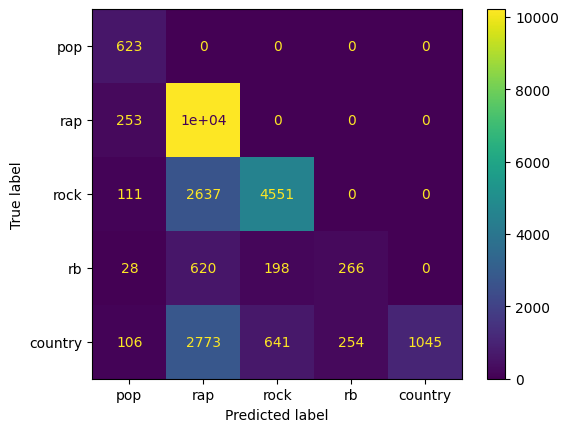

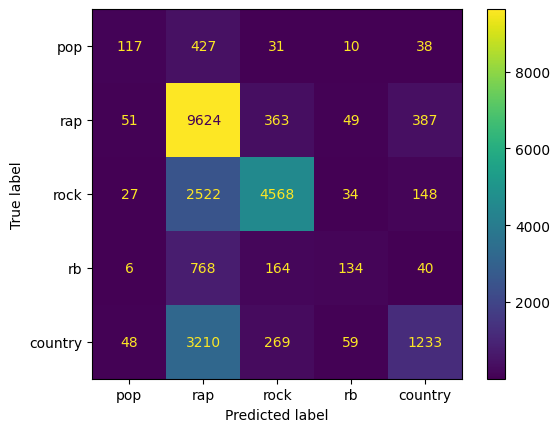

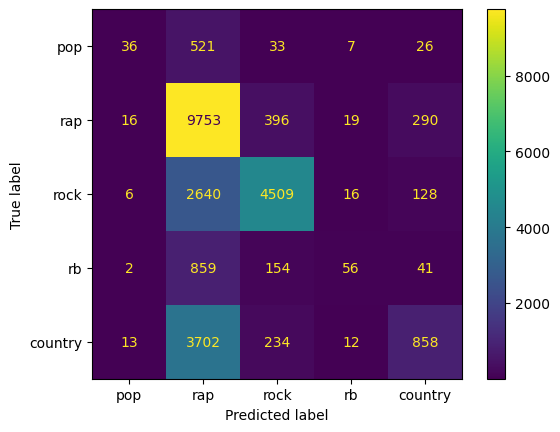

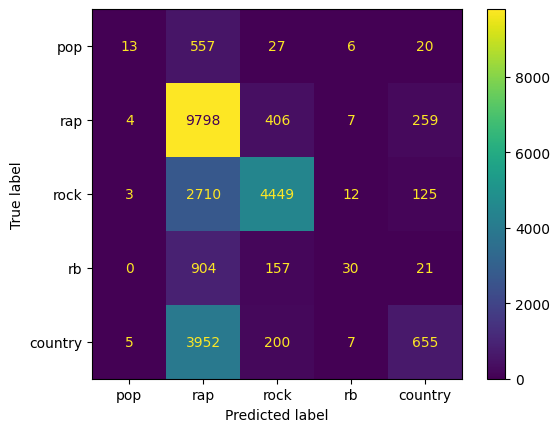

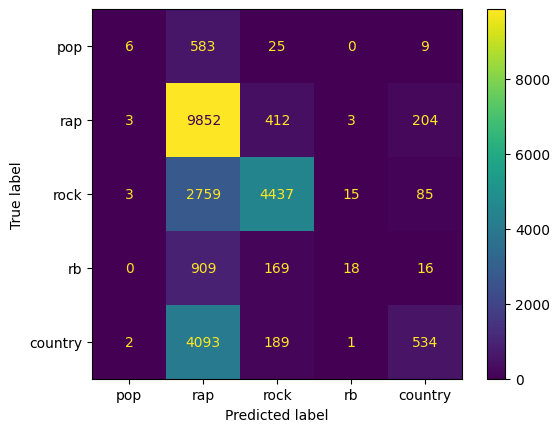

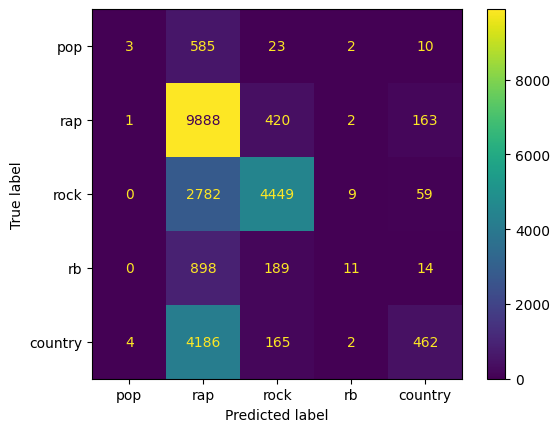

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score


models = []
for i in range(2,18,3):
    model = KNeighborsClassifier(n_neighbors=i)
    model = model.fit(X_train, y_train)

    predictions_train = model.predict(X_train)

    disp = ConfusionMatrixDisplay(confusion_matrix(y_train, predictions_train), display_labels=['pop','rap','rock','rb','country'])
    disp.plot()
    print(f"accuracy ({i}): {accuracy_score(y_train, predictions_train):.4f}")
    models.append(model)

accuracy (2): 0.34500616522811345
accuracy (5): 0.37669543773119607
accuracy (8): 0.3906288532675709
accuracy (11): 0.4033292231812577
accuracy (14): 0.4103575832305795
accuracy (17): 0.42059186189889025


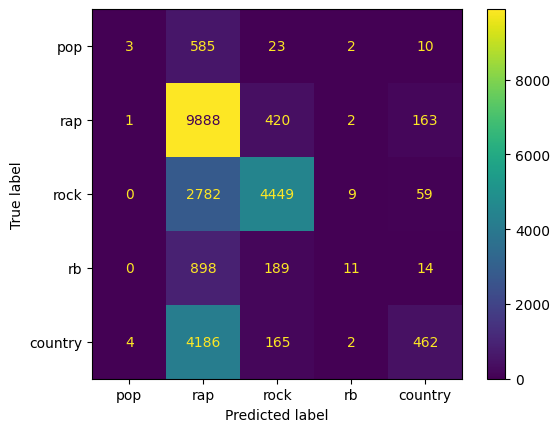

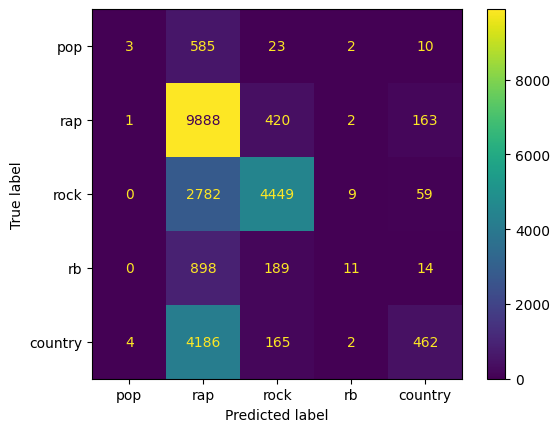

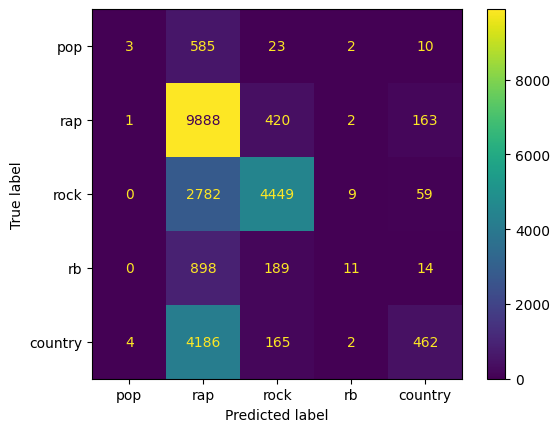

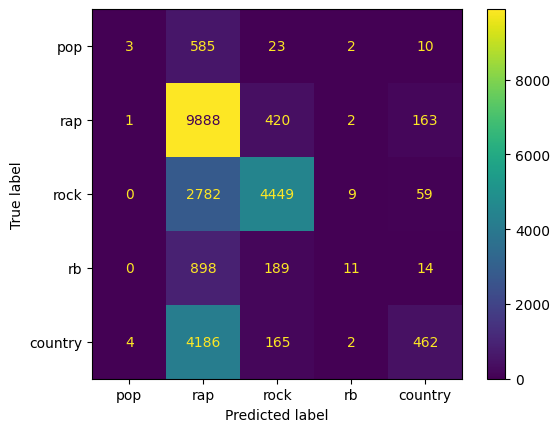

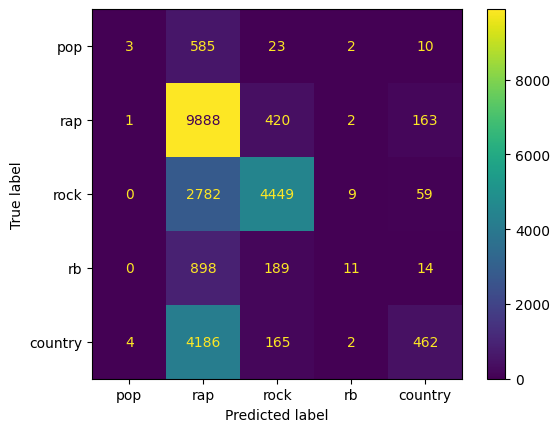

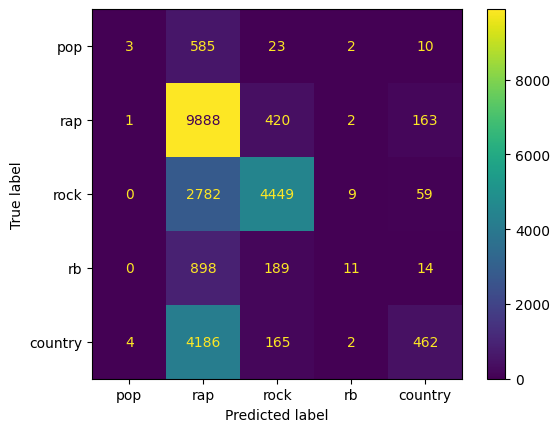

In [48]:
from sklearn.metrics import log_loss

# A function to create and fit a RF with a specific number of trees
def tuneModel(hyperparam_value):
    rf_model = KNeighborsClassifier(n_neighbors=hyperparam_value,weights='distance') 
    #rf_model = RandomForestClassifier(min_samples_split=hyperparam_value, random_state=1)
    rf_model.fit(X_train, y_train)
    y_train_pred_prob = rf_model.predict_proba(X_train)
    y_train_pred = rf_model.predict(X_train)
    y_val_pred_prob = rf_model.predict_proba(X_val)
    y_val_pred = rf_model.predict(X_val)
    train_loss = log_loss(y_train, y_train_pred_prob, labels=['pop', 'rap', 'rock', 'rb', 'country'])
    train_acc = accuracy_score(y_train, y_train_pred)
    val_loss = log_loss(y_val, y_val_pred_prob, labels=['pop', 'rap', 'rock', 'rb', 'country'])
    val_acc = accuracy_score(y_val, y_val_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix(y_train, predictions_train), display_labels=['pop','rap','rock','rb','country'])
    disp.plot()
    print(f"accuracy ({hyperparam_value}): {val_acc}")
    return (train_loss, val_loss, train_acc, val_acc)

# Possible values for the hyperparameter are in the range of 5 to 150 (by 50)
hyp_param_vals = range(2,18,3) # good values for n_estimators
#hyp_param_vals = [2,3] + list(range(5, 50, 10)) # good values for min_samples_split
metrics = []
X_val = tfidf_vectorizer.fit_transform(X_val_raw).toarray()

for hp in hyp_param_vals:
    metrics.append(tuneModel(hp))

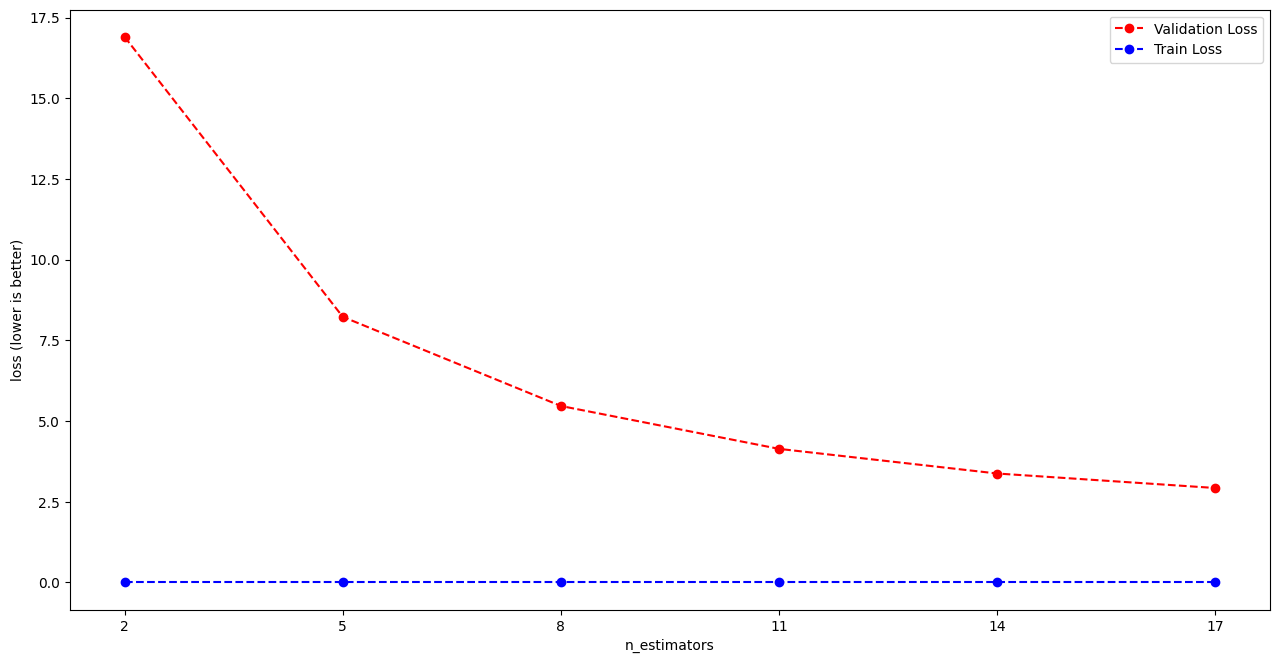

In [49]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes([0, 0, 1, 1]) #.1, 0.1, 0.8, 0.8]) # main axes
ax.plot(hyp_param_vals, [metric[1] for metric in metrics], '--ro') # validattion loss
ax.plot(hyp_param_vals, [metric[0] for metric in metrics], '--bo') # training loss
ax.legend(["Validation Loss", "Train Loss"], loc=1)
ax.set_xticks(hyp_param_vals)
ax.set(xlabel="n_estimators", ylabel="loss (lower is better)")
plt.show()

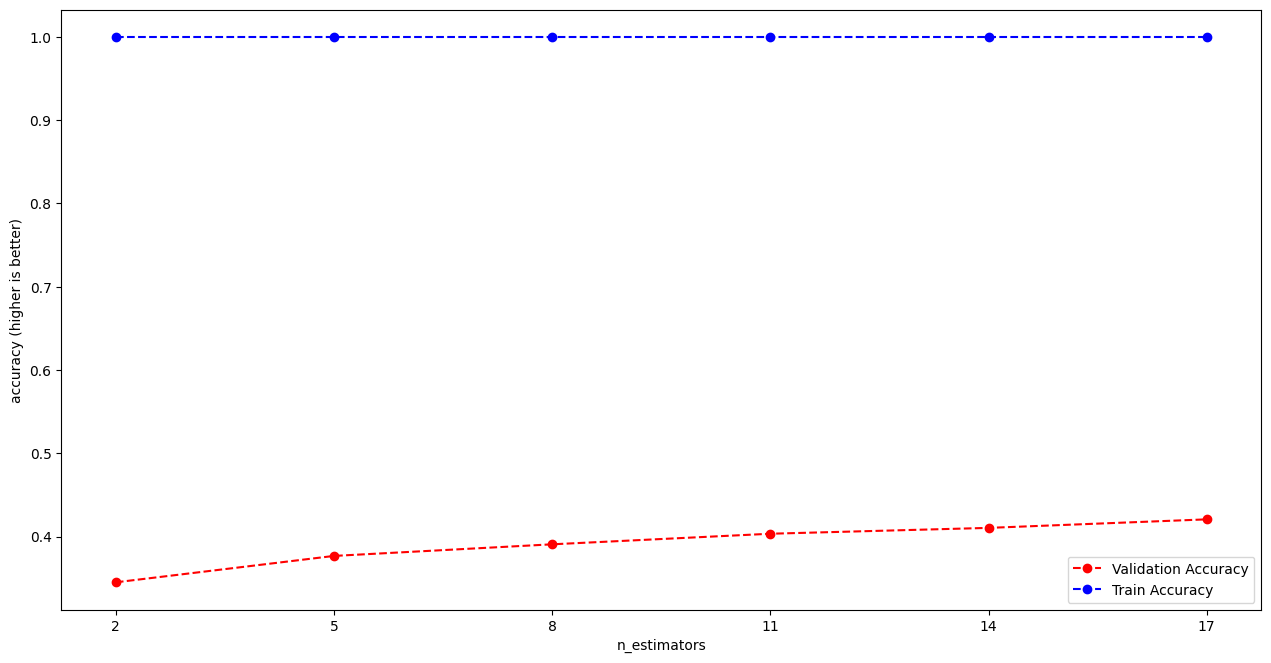

In [50]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes([0, 0, 1, 1]) #.1, 0.1, 0.8, 0.8]) # main axes
ax.plot(hyp_param_vals, [metric[3] for metric in metrics], '--ro') # validattion accuracy
ax.plot(hyp_param_vals, [metric[2] for metric in metrics], '--bo') # training accuracy
ax.legend(["Validation Accuracy", "Train Accuracy"], loc=4)
ax.set_xticks(hyp_param_vals)
ax.set(xlabel="n_estimators", ylabel="accuracy (higher is better)")
plt.show()